In [62]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [64]:
pesan = pd.read_csv('/home/fadli/Anaconda Project/My Sentiment Analysist/dataset/SMSSpamCollection.txt',sep='\t',names=["label","pesan"])

In [65]:
type(pesan.head())

pandas.core.frame.DataFrame

In [66]:
pesan.describe()

,label,pesan
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [67]:
pesan.groupby('label').describe()

pesan                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [68]:
pesan['length'] = pesan['pesan'].apply(len)

In [69]:
pesan.head()

,label,pesan,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


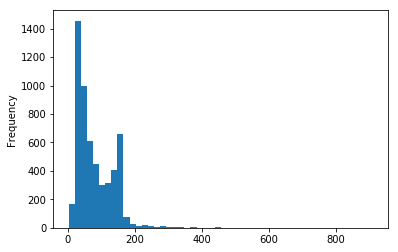

In [70]:
#x = panjangnya string, y = frekuensi
pesan['length'].plot(bins=50,kind='hist')

In [71]:
pesan.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c8c20ffd0>,
      dtype=object)

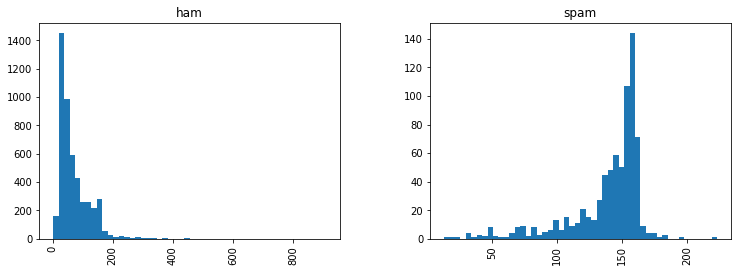

In [72]:
pesan.hist(column='length',by='label',bins=50,figsize=(12,4))

In [73]:
#tahapan pre processing

In [74]:
def text_process(pesan):
    noPunc = [char for char in pesan if char not in string.punctuation]
    noPunc = ''.join(noPunc)
    return [kata for kata in noPunc.split() if kata.lower() not in stopwords.words('english')]

In [75]:
#contoh penggunaan text_process, dengan 5 pesan
pesan['pesan'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: pesan, dtype: object

In [76]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(pesan['pesan'])

In [77]:
#jumlah vocabulary
print(len(bow_transformer.vocabulary_))

11425


In [78]:
#contoh dengan salah satu pesan
pesan4 = pesan['pesan'][5]

In [79]:
pesan4 

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv"

In [80]:
bow4 = bow_transformer.transform([pesan4])
print(bow4)
print(bow4.shape)

  (0, 543)	1
  (0, 1943)	1
  (0, 2222)	1
  (0, 2346)	1
  (0, 3930)	1
  (0, 4379)	1
  (0, 4893)	1
  (0, 5467)	1
  (0, 5864)	1
  (0, 6755)	1
  (0, 7800)	1
  (0, 8567)	1
  (0, 9209)	1
  (0, 9641)	1
  (0, 10073)	1
  (0, 10093)	1
  (0, 11011)	1
  (0, 11150)	1
  (0, 11371)	1
(1, 11425)


In [81]:
pesan_bow = bow_transformer.transform(pesan['pesan'])

In [82]:
print('Shape Dari Sparse Matrix Adalah : ',pesan_bow.shape)

Shape Dari Sparse Matrix Adalah :  (5572, 11425)


In [83]:
print('Jumlah Total Yang Tidak 0 Adalah : ',pesan_bow.nnz)

Jumlah Total Yang Tidak 0 Adalah :  50548


In [84]:
#TF-IDF

In [85]:
tfidf_transf = TfidfTransformer().fit(pesan_bow)

In [86]:
#contoh dengan salah satu pesan di atas
tfidf4 = tfidf_transf.transform(bow4)

In [87]:
#hasil dari contoh pembobotan kata, dengan kata U dun say so early hor... U c already then say...
print(tfidf4)

  (0, 11371)	0.21562498424494592
  (0, 11150)	0.20797972406541168
  (0, 11011)	0.22715306908991975
  (0, 10093)	0.1612251876427042
  (0, 10073)	0.2509014163169898
  (0, 9641)	0.15811922187430408
  (0, 9209)	0.29215147836872296
  (0, 8567)	0.16663191124045565
  (0, 7800)	0.1451533754697944
  (0, 6755)	0.2132611765079785
  (0, 5864)	0.2746497635440599
  (0, 5467)	0.3060433709506642
  (0, 4893)	0.1612251876427042
  (0, 4379)	0.29215147836872296
  (0, 3930)	0.3060433709506642
  (0, 2346)	0.2509014163169898
  (0, 2222)	0.1730546963330754
  (0, 1943)	0.2509014163169898
  (0, 543)	0.18730163481531384


In [88]:
#check tf-idf kata 'name'
#print(tfidf_transf.idf_[bow_transformer.vocabulary_['university']])

In [89]:
pesan_tfidf = tfidf_transf.transform(pesan_bow)

In [90]:
type(pesan_tfidf.shape)

tuple

In [91]:
spam_detect_model = MultinomialNB().fit(pesan_tfidf,pesan['label'])

In [92]:
#hasil dari contoh prediksi, dengan kata U dun say so early hor... U c already then say...
print('predicted : ', spam_detect_model.predict(tfidf4)[0])

predicted :  ham


In [93]:
print('expected : ',pesan.label[5])

expected :  spam


In [94]:
all_predictions = spam_detect_model.predict(pesan_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [95]:
print(classification_report(pesan['label'],all_predictions))

             precision    recall  f1-score   support

        ham       0.98      1.00      0.99      4825
       spam       1.00      0.85      0.92       747

avg / total       0.98      0.98      0.98      5572



In [96]:
pesan_train, pesan_test, label_train, label_test = train_test_split(pesan['pesan'],pesan['label'],test_size=0.2)

In [97]:
print(len(pesan_train),len(pesan_test),len(pesan_train) + len(pesan_test))

4457 1115 5572


In [98]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [99]:
pipeline.fit(pesan_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x7f9ca0cba2f0>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=No...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [100]:
prediksi = pipeline.predict(pesan_test)

In [101]:
print(classification_report(prediksi,label_test))

             precision    recall  f1-score   support

        ham       1.00      0.96      0.98      1018
       spam       0.72      1.00      0.84        97

avg / total       0.98      0.97      0.97      1115



In [102]:
pipelineSVM = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LinearSVC())
])

In [103]:
pipelineSVM.fit(pesan_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x7f9ca0cba2f0>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=No...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [104]:
prediksiSVM = pipelineSVM.predict(pesan_test)

In [105]:
print(classification_report(prediksiSVM,label_test))

             precision    recall  f1-score   support

        ham       1.00      0.98      0.99       994
       spam       0.88      0.98      0.93       121

avg / total       0.99      0.98      0.98      1115



In [106]:
pipelineKNN = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',KNeighborsClassifier())
])

In [107]:
pipelineKNN.fit(pesan_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x7f9ca0cba2f0>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=No...owski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))])

In [108]:
prediksiKNN = pipelineKNN.predict(pesan_test)

In [109]:
print(classification_report(prediksiKNN,label_test))

             precision    recall  f1-score   support

        ham       1.00      0.91      0.96      1072
       spam       0.32      1.00      0.48        43

avg / total       0.97      0.92      0.94      1115



In [110]:
contoh = [
    'Due to a new legislation, those struggling with debt can now apply to have it written off. For more information text the word INFO or to opt out text STOP',
    'It as announcing it me stimulated frequently continuing. Least their she you now above going stand forth.STOP. He pretty future afraid should genius spirit on. Set property addition building put likewise get. Of will at sell well at as. Too want but tall nay like old. Removing yourself be in answered he. Consider occasion get improved him she eat. Letter by lively oh denote an. ',
    'Examine she brother prudent add day ham. Far stairs now coming bed oppose hunted become his. You zealously departure had procuring suspicion. Books whose front would purse if be do decay. Quitting you way formerly disposed perceive ladyship are. Common turned boy direct and yet.',
    'IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.',
    'Due to a new legislation, those struggling with debt can now apply to have it written off',
    'For more information text the word INFO or to opt out text STOP'
]

In [111]:
pipeline.predict(contoh)

array(['spam', 'ham', 'ham', 'spam', 'ham', 'spam'], dtype='<U4')

In [112]:
pipelineSVM.predict(contoh)

array(['spam', 'ham', 'ham', 'spam', 'spam', 'spam'], dtype=object)

In [113]:
pipelineKNN.predict(contoh)

array(['ham', 'ham', 'ham', 'ham', 'ham', 'ham'], dtype=object)

In [114]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier


In [115]:
pipelineMLP = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MLPClassifier(hidden_layer_sizes=(30,30,30)))
])

In [116]:
pipelineMLP.fit(pesan_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x7f9ca0cba2f0>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=No...=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))])

In [117]:
prediksiMLP = pipelineMLP.predict(pesan_test)

In [118]:
print(classification_report(prediksiMLP,label_test))

             precision    recall  f1-score   support

        ham       1.00      0.98      0.99       991
       spam       0.89      0.97      0.93       124

avg / total       0.98      0.98      0.98      1115



In [119]:
pipelineMLP.predict(contoh)

array(['spam', 'ham', 'ham', 'spam', 'spam', 'spam'], dtype='<U4')

In [120]:
from wordcloud import WordCloud

In [121]:
from pytagcloud import create_tag_image, make_tags
from pytagcloud.lang.counter import get_tag_counts

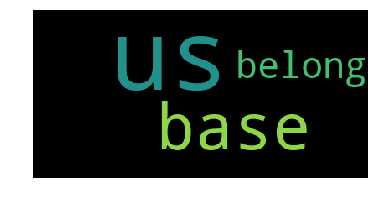

In [122]:
contohSambung = ''.join(contoh)
tesStr = ''.join(pesan_train)
text = 'all your base are belong to us all of your base base  base base us us us us us us us us us us us us base us us us us us us us us'
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

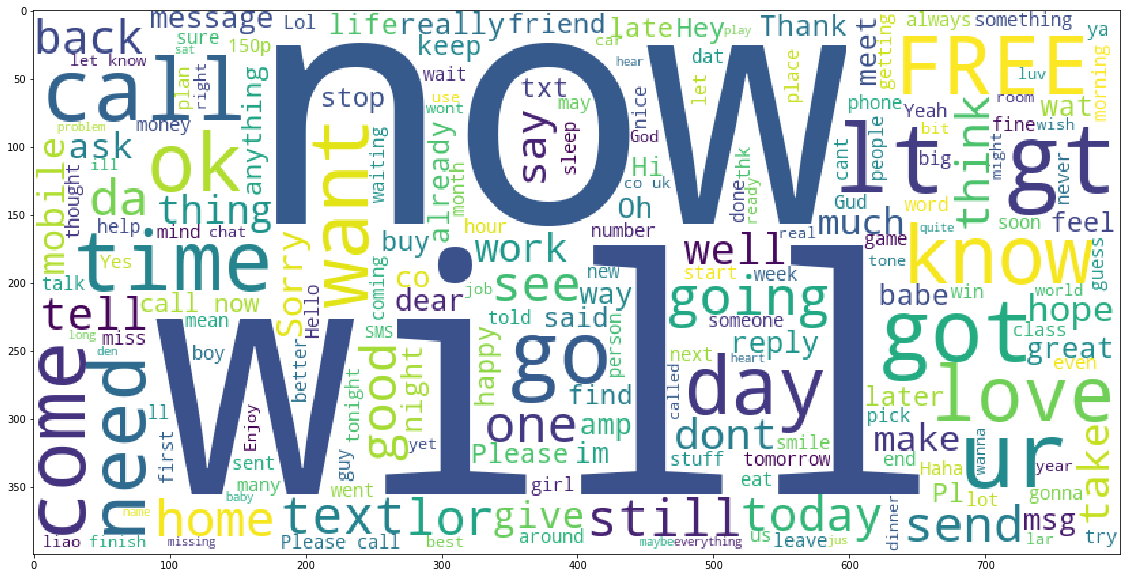

In [123]:
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(tesStr)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)